In [1]:
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import sympy as sym
from sympy.abc import x, y, k, p, m
from sympy import oo
from sympy import init_printing
init_printing(use_latex='mathjax')
from scipy import *
from scipy import integrate
from scipy.integrate import ode
"""
sym.apart() is separation of partial fractions
sym.diff(eq, variable - usually x, degree/order of diff 1=first derivative, 2=second derivative etc.) is ODE or ordinary differentiation
sym.integrate is indefinite integration
.evalf() gives numeric result
"""

'\nsym.apart() is separation of partial fractions\nsym.diff(eq, variable - usually x, degree/order of diff 1=first derivative, 2=second derivative etc.) is ODE or ordinary differentiation\nsym.integrate is indefinite integration\n.evalf() gives numeric result\n'

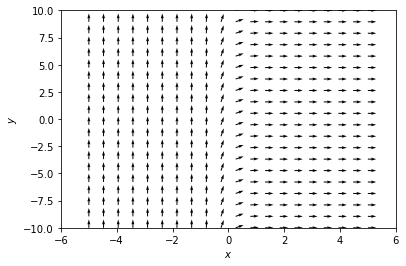

In [38]:
fig = plt.figure(num=111)
ax=fig.add_subplot(111)

## Vector field function
def vf(t,x):
  dx=np.zeros(2)
  dx[0]=1
  dx[1]= np.exp(-4*x[0]) #**2-x[0]-2
  return dx

#Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)
ic=[[-3.5,-10], [-3,-10], [-2.5,-10]]
color=['r','b','g']
for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 1.25)

#Vector field
X,Y = np.meshgrid( np.linspace(-5,5,20),np.linspace(-10,10,20) )
U = 1
#V = X**2-X-2
V = np.exp(-4*X)
#Normalize arrows using least squares
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2, scale=40)


plt.xlim([-6,6])
plt.ylim([-10,10])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

In [29]:
i = 9
print(U2[0:,i])
print(V2[0:,i])

[0.51428624 0.51428624 0.51428624 0.51428624 0.51428624 0.51428624
 0.51428624 0.51428624 0.51428624 0.51428624 0.51428624 0.51428624
 0.51428624 0.51428624 0.51428624 0.51428624 0.51428624 0.51428624
 0.51428624 0.51428624]
[-0.8576186 -0.8576186 -0.8576186 -0.8576186 -0.8576186 -0.8576186
 -0.8576186 -0.8576186 -0.8576186 -0.8576186 -0.8576186 -0.8576186
 -0.8576186 -0.8576186 -0.8576186 -0.8576186 -0.8576186 -0.8576186
 -0.8576186 -0.8576186]


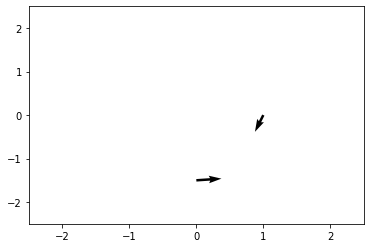

In [24]:
fig, ax = plt.subplots()

x_pos = [0, 1]
y_pos = [-1.5, 0]
x_direct = [1.5, -0.5]
y_direct = [0.1, -1]


ax.quiver(x_pos,y_pos,x_direct,y_direct,
         scale=20)
ax.axis([-2.5, 2.5, -2.5, 2.5])


plt.show()

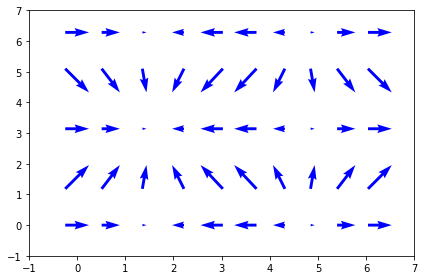

In [28]:
X, Y = np.mgrid[:2*np.pi:10j,:2*np.pi:5j]
U = np.cos(X)
V = np.sin(Y)

fig, ax = plt.subplots(1,1)
Q = ax.quiver(X, Y, U, V, pivot='mid', color='b', units='inches')

ax.set_xlim(-1, 7)
ax.set_ylim(-1, 7)

def update_quiver(num, Q, X, Y):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """

    U = np.cos(X + num*0.1)
    V = np.sin(Y + num*0.1)

    Q.set_UVC(U,V)

    return Q,

# you need to set blit=False, or the first set of arrows never gets
# cleared on subsequent frames
anim = animation.FuncAnimation(fig, update_quiver, fargs=(Q, X, Y),
                               interval=50, blit=False)
fig.tight_layout()
plt.show()

In [57]:
expr = ((-10)* x + 5) / ((3 * x - 1)*(x - 2))
#print(Fraction(str(sym.apart(expr))), "      ", sym.integrate(expr))
print("Expression:")
sym.pprint(expr)
print()
print("separation of partial fractions:")
sym.pprint(sym.apart(expr))
print()
print("Integration:")
sym.pprint(sym.integrate(expr))

sym.pprint((expr, sym.apart(expr), sym.integrate(expr)))

Expression:
     5 - 10⋅x    
─────────────────
(x - 2)⋅(3⋅x - 1)

separation of partial fractions:
     1        3  
- ─────── - ─────
  3⋅x - 1   x - 2

Integration:
                log(x - 1/3)
-3⋅log(x - 2) - ────────────
                     3      
⎛     5 - 10⋅x           1        3                    log(x - 1/3)⎞
⎜─────────────────, - ─────── - ─────, -3⋅log(x - 2) - ────────────⎟
⎝(x - 2)⋅(3⋅x - 1)    3⋅x - 1   x - 2                       3      ⎠


In [14]:
sym.integrate((-1)*(3*x-1)**(-1))

-log(3*x - 1)/3

In [89]:
sym.limit(sym.log(3*x), x, 3)

2⋅log(3)

In [15]:
sym.integrate(expr)

-3*log(x - 2) - log(x - 1/3)/3

In [20]:
tqdm(sym.diff(x**5, x, 4))

0it [00:00, ?it/s]

In [28]:
sym.diff(x**2 - 1, x, 2)

2

In [79]:
sym.diff(sym.cos(x**2), x, 4)

4*(4*x**4*cos(x**2) + 12*x**2*sin(x**2) - 3*cos(x**2))

In [3]:
sym.diff((x**2 - 1) * sym.cos(x), x, 1)

2*x*cos(x) - (x**2 - 1)*sin(x)

In [5]:
f1 = x**3 + x**2 + x
f2 = sym.exp(x**2-2*x)*sym.exp(-2*x)
sym.diff(f2, x, 1)

(2*x - 2)*exp(-2*x)*exp(x**2 - 2*x) - 2*exp(-2*x)*exp(x**2 - 2*x)

In [63]:
sym.diff(sym.exp(2*x**2)+sym.exp(x), x, 1)

4*x*exp(2*x**2) + exp(x)

In [17]:
sym.integrate(sym.cos(x**2), (x, 0, sym.pi/2))

sqrt(2)*sqrt(pi)*fresnelc(sqrt(2)*sqrt(pi)/2)*gamma(1/4)/(8*gamma(5/4))

In [18]:
sym.diff(sym.exp(x**2)).series(n=10)#.evalf(subs={x: 0.5})

                   7    9         
         3    5   x    x     ⎛ 10⎞
2⋅x + 2⋅x  + x  + ── + ── + O⎝x  ⎠
                  3    12         

In [5]:
sym.diff(k*p*(1-p/m), p, 2)

-2*k/m

In [92]:
sym.limit(sym.sin(x)/x, x, 1)

sin(1)

In [6]:
expr = (x*sym.sin(x))
expr.integrate().series(n=10)

 3    5     7      9          
x    x     x      x      ⎛ 10⎞
── - ── + ─── - ───── + O⎝x  ⎠
3    30   840   45360         

In [30]:
expr = -100 + 5 * sym.exp(2*k)
expr.evalf(k)

1.7e+2

In [32]:
expr = 1 / (6**2 + x**2)
expr.apart()

   1   
───────
 2     
x  + 36

In [34]:
expr = ((-1)*x + 13)/((x+2)*(x-1))
expr.integrate()

4⋅log(x - 1) - 5⋅log(x + 2)

In [42]:
expr = sym.pi * ((y**6) - ((5.4*y))**2)
sym.integrate(expr, (x, 0, 12.548)).evalf()

                  6                     2
39.4207046172447⋅y  - 1149.50774663886⋅y 

In [10]:
expr = sym.cot(x) #3 * sym.sin(x)
expr.integrate()

log(sin(x))

In [11]:
sym.diff(sym.log(sym.sin(x)))

cos(x)
──────
sin(x)

In [12]:
sym.diff(sym.cot(x))

     2       
- cot (x) - 1

In [14]:
sym.diff(sym.log(sym.sin(x)))

cos(x)
──────
sin(x)

In [15]:
(3**4)/4

20.25